# 模板匹配

### 和卷积类似,模板在图像上滑动,计算模板覆盖区域与模板的差异,然后把差异结果输出,假设原始图像是A*B大小,模板是a*b,那么,输出的结果是一个(A-a+1)*(B-b+1)的矩阵

1. TM_SQDIFF: 计算平方差异,值越小,相关性越强
2. TM_CCORR: 计算相关性,值越大,相关性越强
3. TM_CCOEFF: 计算相关系数,值越大,相关性越强
4. TM_SQDIFF_NORMED: 计算归一化平方差异,值越接近于0,相关性越强
5. TM_CCORR_NORMED: 计算归一化相关性,值越接近于1,相关性越强
6. TM_CCOEFF_NORMED: 计算归一化相关系数,值越接近于1,相关性越强

[公式](https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640fe1f58fe91a2d7583695d)

In [117]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [118]:
def imshow(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [119]:
img = cv2.imread('./img/marior_coin.jpg')
template = cv2.imread('./img/coin.jpg')

In [120]:
print(img.shape)
print(template.shape)

(212, 227, 3)
(31, 23, 3)


In [121]:
mt_res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
mt_res.shape

(182, 205)

In [122]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(mt_res)

In [123]:
print(min_val, max_val, min_loc, max_loc)

2072443.0 35500560.0 (123, 43) (204, 181)


In [124]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

4


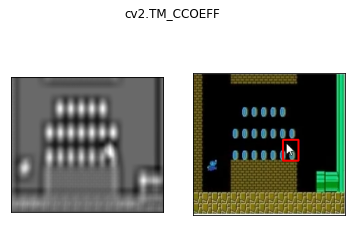

5


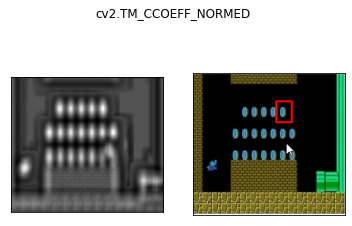

2


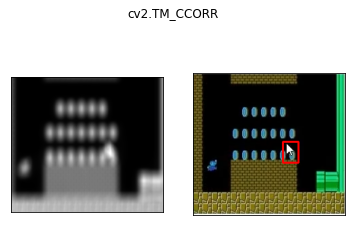

3


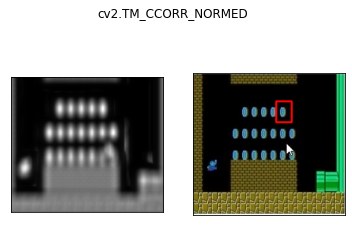

0


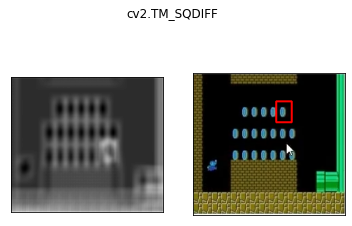

1


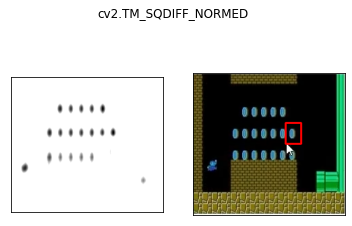

In [125]:
for method in methods:
    img2 = img.copy()

    eval_method = eval(method)
    print(eval_method)
    res = cv2.matchTemplate(img, template, eval_method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if eval_method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

    cv2.rectangle(img2, top_left, bottom_right, 255, 2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(method)
    plt.show()
    # imshow(method, img2)

## 多对象匹配

In [137]:
img_coin = cv2.imread('./img/marior_coin.jpg')
img_gray = cv2.cvtColor(img_coin, cv2.COLOR_BGR2GRAY)

template_gray = cv2.imread('./img/coin.jpg', cv2.IMREAD_GRAYSCALE)
h,w = template_gray.shape[:2]

res = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)
threshold = 0.75

loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_coin, pt, bottom_right, (0, 0, 255), 2)

imshow('Match Template Mutiple Object', img_coin)
